In [2071]:
#Import necessary libraries and supress the warnings


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2072]:
#Import the dataset

leads_data = pd.read_csv('C:\\Users\\hp\\Lead+Scoring+Case+Study\\Lead Scoring Assignment\\Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2073]:
#Checking the shape of the data given
leads_data.shape

(9240, 37)

In [2074]:
#Checking the complete dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2075]:
#The check the  numeric Values
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2076]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [2077]:
##Cleaning the Given Dataframe

# Convert 'Select' values to NaN.

leads_data1 = leads_data.replace('Select',np.nan)

In [2078]:
# Checking the percentage of missing 

round(100*(leads_data1.isnull().sum()/len(leads_data1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [2079]:
#Some columns have high percentage of missing values. We can drop the columns with missing values greater than 40% 

leads_data2= leads_data1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Lead Quality','How did you hear about X Education'],axis=1)
leads_data2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [2080]:
#checking null values percentage

round(leads_data2.isnull().sum()/len(leads_data2.index),2)*100

Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums                                0.0
Newspaper                                         0.0
Digital Advertisement       

In [2081]:
#1)Doing a category analysis on column "Country". It has 27% missing values

leads_data2['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

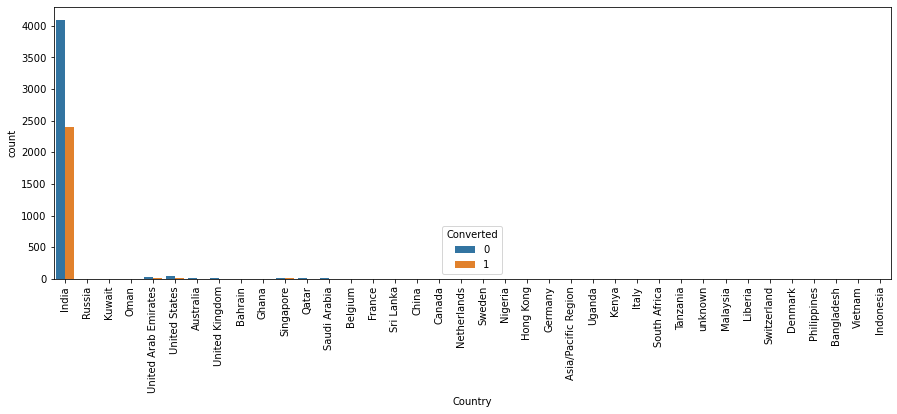

In [2082]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data2.Country, hue=leads_data2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2083]:
# As India is having more  common occurence among the non-missing values we can impute all missing values with India
leads_data2['Country'] = leads_data2['Country'].replace(np.nan,'India')

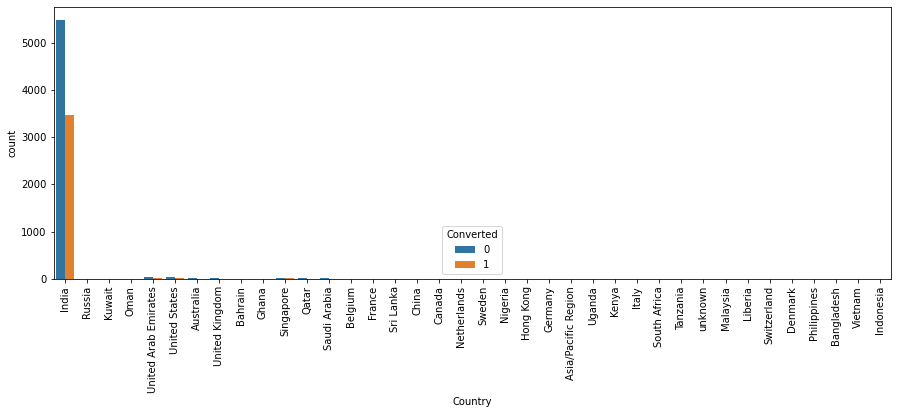

In [2084]:
#plotting  Country columnn after replacing NaN values
plt.figure(figsize=(15,5))
s1=sns.countplot(leads_data2.Country, hue=leads_data2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [2085]:
#2)Checking the column"city". This column has 40% missing values
leads_data2['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [2086]:
leads_data2['City'] = leads_data2['City'].replace(np.nan,'Mumbai')

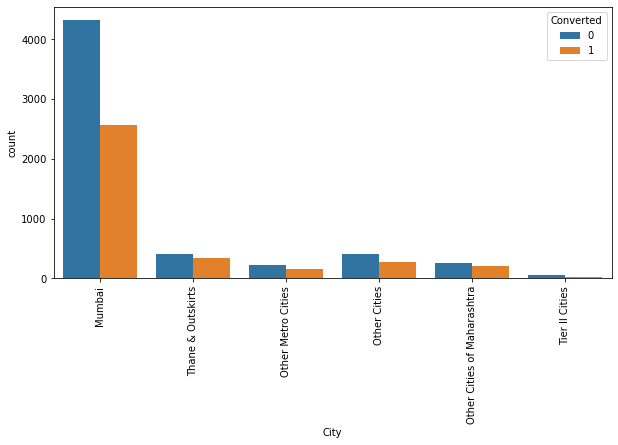

In [2087]:
#plotting spread of City 

plt.figure(figsize=(10,5))
s1=sns.countplot(leads_data2.City, hue=leads_data2.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

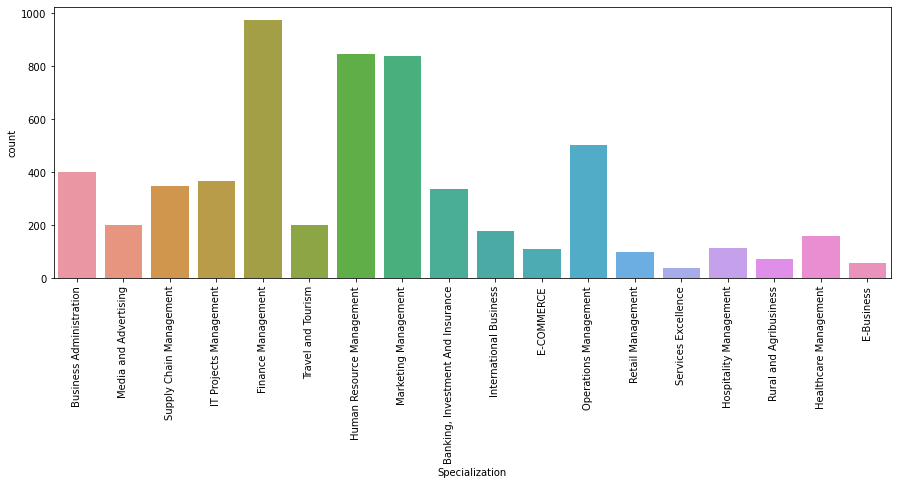

In [2088]:
#3)Checking the column"Specialization" .This has 37% missing values

plt.figure(figsize=(15,5))
sns.countplot(leads_data2['Specialization'])
plt.xticks(rotation=90)

In [2089]:
#There are  37% missing values present in the Specialization column .We can create a another category 'Others' for this as he or she may be a student or not having any specialization or his specialization is not there in the options given. 

In [2090]:
leads_data2['Specialization'] = leads_data2['Specialization'].replace(np.nan, 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

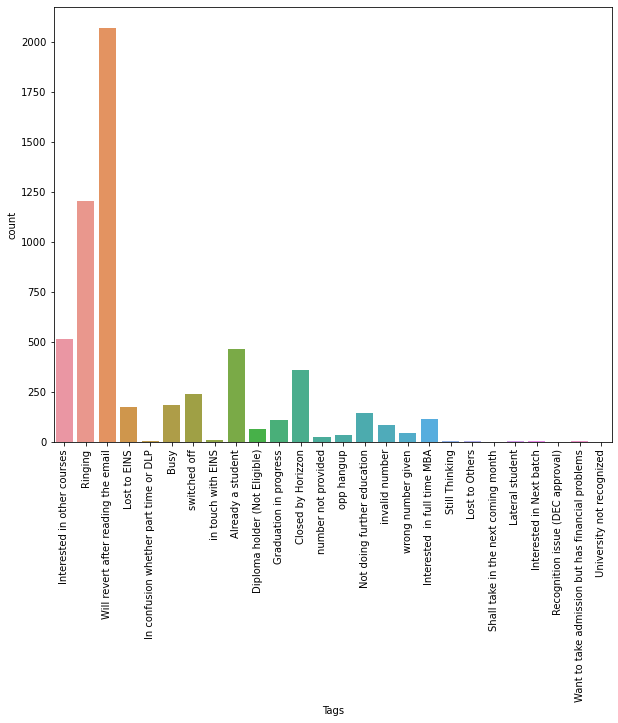

In [2091]:
#4)Checking the "Tag" column. It has 36% missing values
# Visualizing Tags column
plt.figure(figsize=(10,8))
sns.countplot(leads_data2['Tags'])
plt.xticks(rotation=90)

In [2092]:
# Imputing the missing data in the tags column with 'Will revert after reading the email'
leads_data2['Tags']=leads_data2['Tags'].replace(np.nan,'Will revert after reading the email')

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

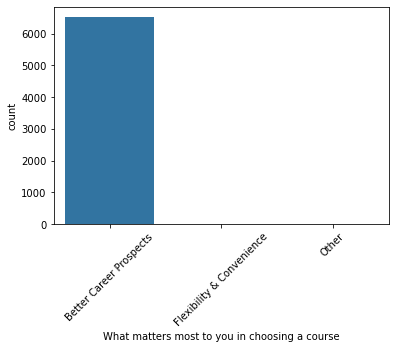

In [2093]:
#5)Analysing Column  matters most to you in choosing a course'.
#this column has 29% missing values


# Visualizing this column
sns.countplot(leads_data2['What matters most to you in choosing a course'])
plt.xticks(rotation=45)

In [2094]:
# Finding the percentage of the different categories of this column:
round(leads_data2['What matters most to you in choosing a course'].value_counts(normalize=True),2)*100

Better Career Prospects      100.0
Flexibility & Convenience      0.0
Other                          0.0
Name: What matters most to you in choosing a course, dtype: float64

In [2095]:
# Dropping this column 
leads_data2=leads_data2.drop('What matters most to you in choosing a course',axis=1)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

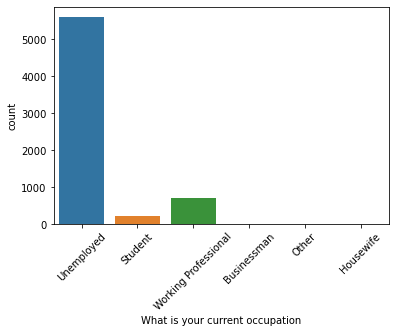

In [2096]:
#6)Checking the column 'What is your current occupation '.It has column has 29% missing values
sns.countplot(leads_data2['What is your current occupation'])
plt.xticks(rotation=45)

In [2097]:
# Percentage of the different categories of this column:
round(leads_data2['What is your current occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: What is your current occupation, dtype: float64

In [2098]:
# Imputing the missing data in the 'What is your current occupation' column with 'Unemployed' most values are 'Unemployed'
leads_data2['What is your current occupation']=leads_data2['What is your current occupation'].replace(np.nan,'Unemployed')

In [2099]:
# Finding the null percentages across columns after removing the above columns
round(leads_data2.isnull().sum()/len(leads_data2.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 1.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        1.0
Last Activity                               1.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [2100]:
# Dropping the rows with null values
leads_data2.dropna(inplace = True)

In [2101]:
# Finding the null percentages across columns after removing the above columns
round(leads_data2.isnull().sum()/len(leads_data2.index),2)*100

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Country                                     0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                    

In [2102]:
##Exploratory Data Anaysis

#Lead Conversion Rate
Converted = (sum(leads_data2['Converted'])/len(leads_data2['Converted'].index))*100
Converted

37.85541106458012

In [2103]:
#The lead conversion rate is 38%

In [2104]:
##1)Lead Origin

leads_data2['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

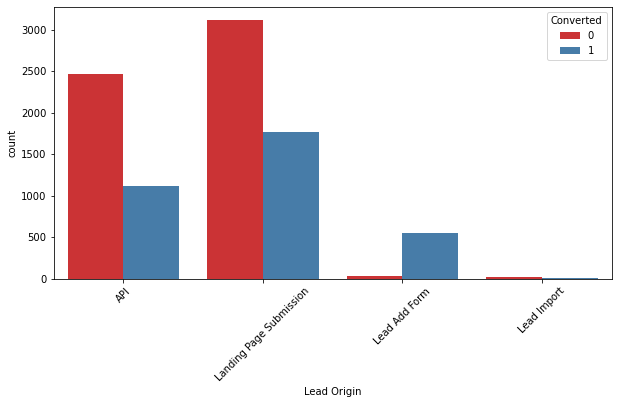

In [2105]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data2,palette='Set1')
plt.xticks(rotation = 45)

In [2106]:
#Inference
#API and Landing Page Submission has higher number of leads as well as conversion.
#Lead Add Form has high  conversion rate(around 90%) but lead count is not as high
#Lead Import and Quick Add Form has  few leads.
##To  improve overall lead conversion rate, we need to improve lead conversion of API and Landing Page Submission  and generate more leads from Lead Add Form.

In [2107]:
##2)Lead Source
leads_data2['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

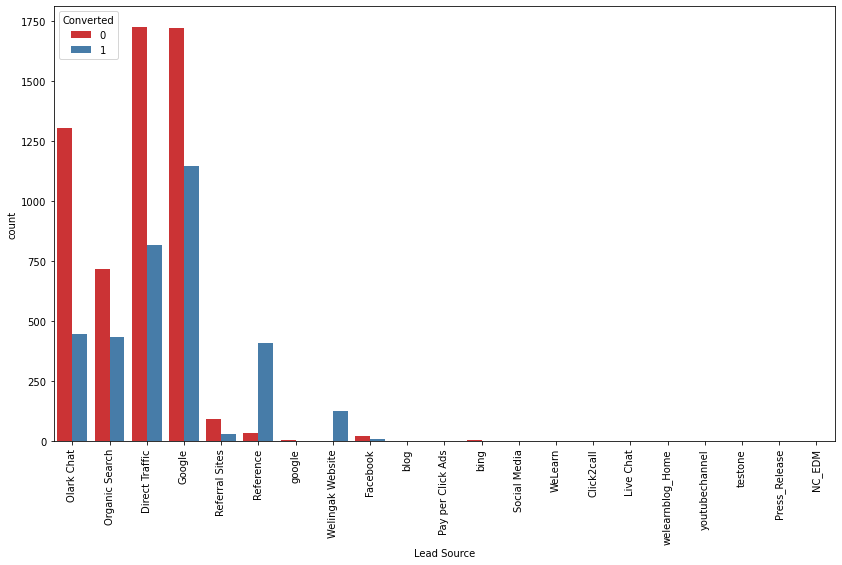

In [2108]:
plt.figure(figsize=(14,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data2, palette='Set1')
plt.xticks(rotation = 90)

In [2109]:
# Creating a new category 'Others' for some of the Lead Sources which do not have much values.
leads_data2['Lead Source'] = leads_data2['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'google'),
  Text(7, 0, 'Welingak Website'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'Others')])

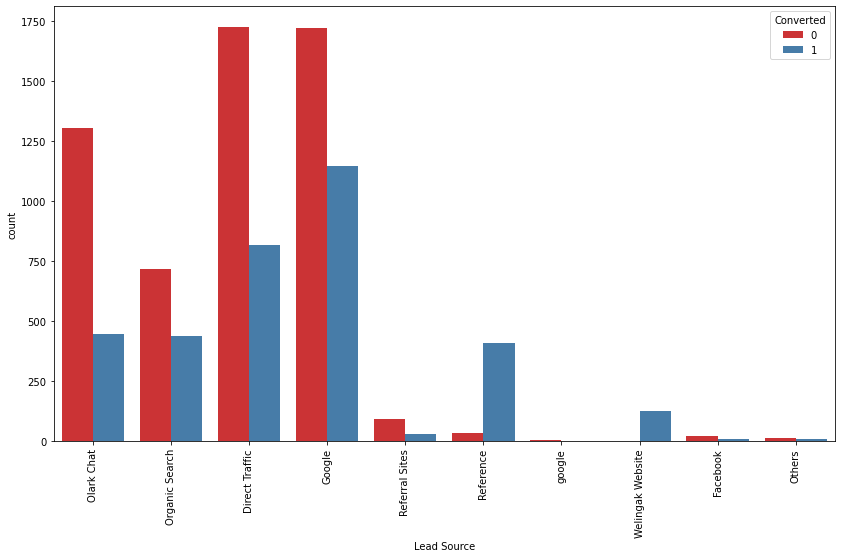

In [2110]:
# Visualizing again
plt.figure(figsize=(14,8))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data2,palette='Set1')
plt.xticks(rotation = 90)

In [2111]:
##Inference
#Maximum number of leads are generated by Google and Direct traffic.
#Conversion Rate of reference leads and leads through welingak website is comparatively high.


#To improve overall lead conversion rate, There should be more focus on lead conversion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

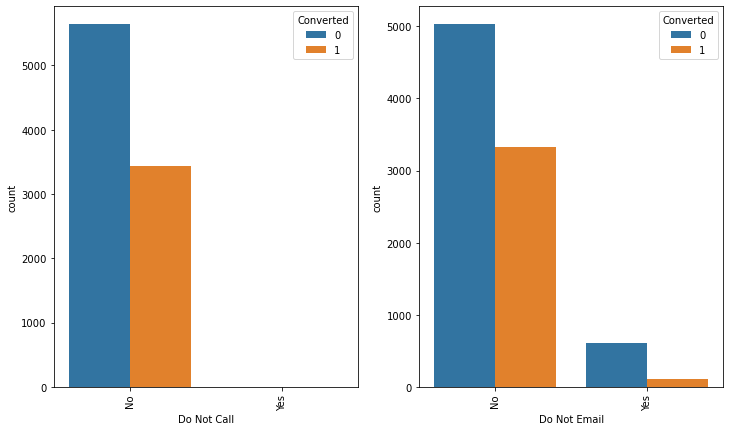

In [2112]:
#3)Checking Do Not Email & Do Not Call
#Visualization on count of Variable based on Converted value
plt.figure(figsize=(12,7))

ax1=plt.subplot(1, 2, 1)
ax1=sns.countplot(leads_data2['Do Not Call'], hue=leads_data.Converted)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

ax2=plt.subplot(1, 2, 2)
ax2=sns.countplot(leads_data2['Do Not Email'], hue=leads_data.Converted)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()

In [2113]:
#checking value counts for Do Not Call and DoNotEmail
leads_data2['Do Not Call'].value_counts(dropna=False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [2114]:
#checking value counts for Do Not Email
leads_data2['Do Not Email'].value_counts(dropna=False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [2115]:
#In both cases, majority is"NO" and hence noo Inference can be drawn with this parameter.

In [2116]:
##4)Checkign TotalVists
#Checking the percentile value
leads_data2['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

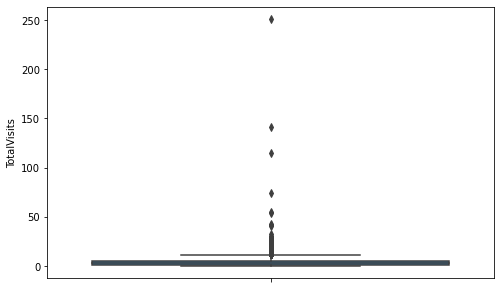

In [2117]:
#visualizing spread of variable

plt.figure(figsize=(8,5))
sns.boxplot(y=leads_data2['TotalVisits'])
plt.show()

In [2118]:
#There  are number of outliers in the data. We will cap the outliers to 95% value for analysis.
percentiles = leads_data2['TotalVisits'].quantile([0.05,0.95]).values
leads_data2['TotalVisits'][leads_data2['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data2['TotalVisits'][leads_data2['TotalVisits'] >= percentiles[1]] = percentiles[1]

<AxesSubplot:xlabel='TotalVisits'>

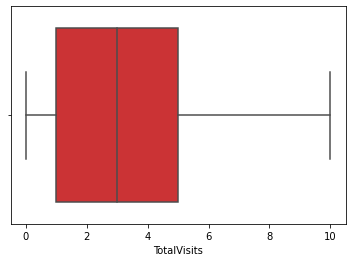

In [2119]:
# Visualizing again
sns.boxplot(leads_data2['TotalVisits'],orient='vert',palette='Set1')

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

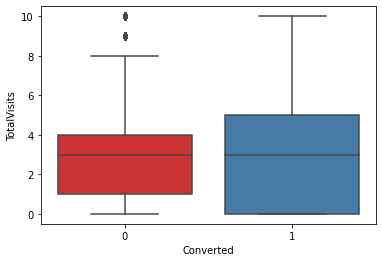

In [2120]:
#Visualization of converted data
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data2,palette='Set1')

In [2121]:
##Inference :Median for converted and not converted leads are the same.


In [2122]:
#5)Analysing "Total Time Spent on Website" and checking the percentile

leads_data2['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

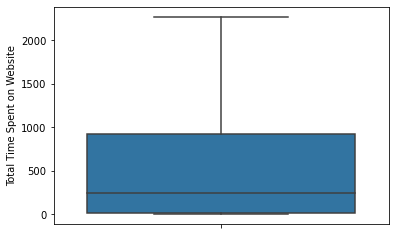

In [2123]:
#Visualization

plt.figure(figsize=(6,4))
sns.boxplot(y=leads_data2['Total Time Spent on Website'])
plt.show()


<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

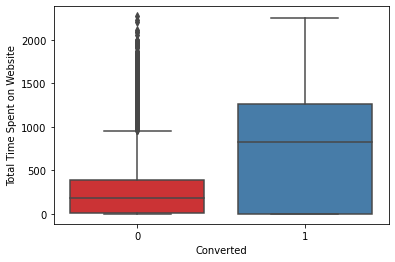

In [2124]:
#Visualization of converted data
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data2,palette='Set1')

In [2125]:
#Inference
#Leads spending more time on the website are more likely to be converted.
#Website should be made more engaging to  spend more time.

In [2126]:
#6)Analysing "Last Activity"
leads_data2['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'SMS Sent'),
  Text(12, 0, 'Visited Booth in Tradeshow'),
  Text(13, 0, 'Approached upfront'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

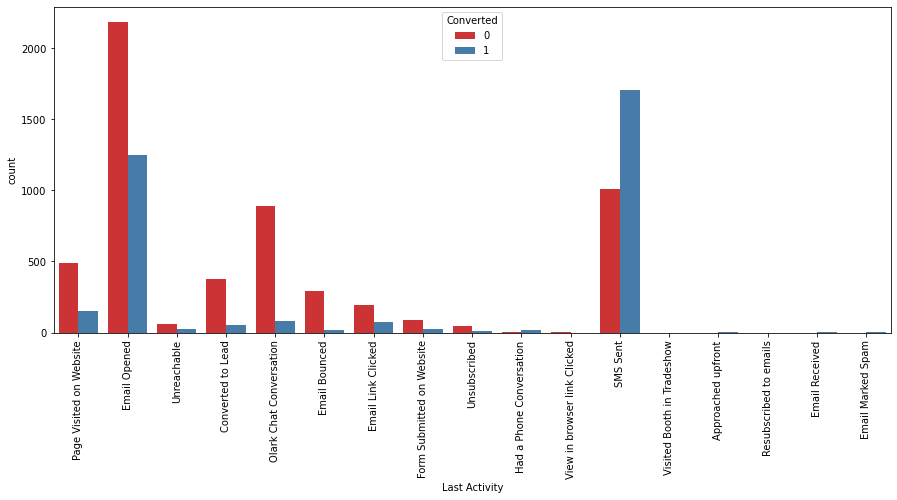

In [2127]:
#Visualizing "Last Activity"
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data2,palette='Set1')
plt.xticks(rotation = 90)

In [2128]:
# Combine Last activities to "Other_Activity" which are having less data.
leads_data2['Last Activity'] = leads_data2['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other_Activity'),
  Text(10, 0, 'SMS Sent')])

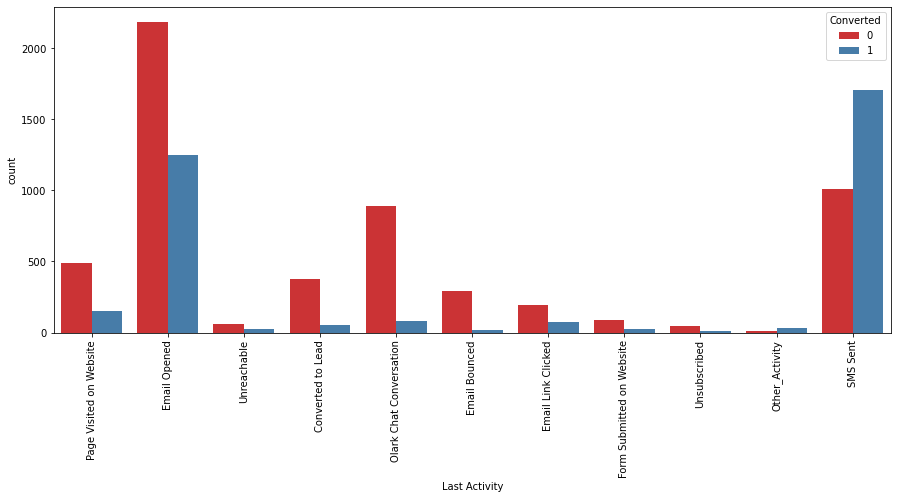

In [2129]:
# Visualizing again
plt.figure(figsize=(15,6))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data2,palette='Set1')
plt.xticks(rotation = 90)

In [2130]:
#Inference
#Most of the lead have their Email opened as their last activity.
#Conversion rate for last activity as SMS Sent is almost 60%.

In [2131]:
#Conclusion
#Based on the univariate analysis, many columns are not having any information to the model, hence dropping

In [2132]:
leads_data2 = leads_data2.drop(['Tags','Country','Search','Magazine','Newspaper Article','X Education Forums',
                            'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview'],1)

In [2133]:
leads_data2.shape

(9074, 13)

In [2134]:
leads_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Do Not Call                      9074 non-null   object 
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  City                             9074 non-null   object 
 12  Last Notable Activit

In [2135]:
##Preparing Data
#1)Conversion of Binary Variables
vars =  ['Do Not Email', 'Do Not Call']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

leads_data2[vars] = leads_data2[vars].apply(binary_map)

In [2136]:
#2)# Dummy variable Creation for the categorical variables and dropping the first one.
dummy_data = pd.get_dummies(leads_data2[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity']], drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [2137]:
# Concatenating the dummy_data to the lead_data dataframe
leads_data2 = pd.concat([leads_data2, dummy_data], axis=1)
leads_data2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,...,0,0,1,0,0,0,0,0,0,0


In [2138]:
#Drop the columns for which dummies were created

leads_data2 = leads_data2.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                             'City','Last Notable Activity'], axis = 1)

In [2139]:
leads_data2.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [2140]:
##Test-Train Split
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads_data2.drop('Converted', axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [2141]:
# Putting response variable to y
y = leads_data2['Converted']

y.head()



0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2142]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [2143]:
#Data Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.292645,-0.017749,-0.432779,-0.160255,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,3.417111,-0.017749,-0.432779,-0.540048,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-0.292645,-0.017749,-1.150329,-0.888650,-1.132538,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.292645,-0.017749,-0.432779,1.643304,-0.179666,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,-0.292645,-0.017749,0.643547,2.017593,0.058552,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [2144]:
#Lead Conversion Rate
Converted = (sum(leads_data2['Converted'])/len(leads_data2['Converted'].index))*100
Converted

37.85541106458012

In [2145]:
#Conversion Rate is 37.8%

In [2146]:
#Model Building using Stats Model & RFE:

In [2147]:
# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE
from sklearn.feature_selection import RFE

# Running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [2148]:
rfe.support_

array([False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False,  True, False, False])

In [2149]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 13),
 ('Do Not Call', False, 43),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 32),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Facebook', False, 26),
 ('Lead Source_Google', False, 27),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 46),
 ('Lead Source_Others', False, 30),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', False, 29),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 17),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 40),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 16)

In [2150]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Other_Activity', 'Last Activity_SMS Sent',
       'Specialization_Others', 'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [2151]:
##Assessing the model with StatsModels
#Model 1
import statsmodels.api as sm

In [2152]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2648.2
Date:                Tue, 28 Feb 2023   Deviance:                       5296.4
Time:                        19:54:38   Pearson chi2:                 6.54e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3929
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1228      0.126     -0.979      0.328      -0.369       0.123
Total Time Spent on Website                              1.1139      0.040     27.680      0.000       1.035       1.193
Lead Origin_Landing Page Submission                     -1.2023      0.127     -9.439      0.000      -1.452      -0.953
Lead Origin_Lead Add Form                                1.6611      0.918      1.809      0.070      -0.139       3.461
Lead Source_Olark Chat                                   1.0298      0.120      8.559      0.000       0.794       1.266
Lead Source_Reference                                    1.7044      0.942      1.810      0.070      -0.141       3.550
Lead Source_Welingak Website                             4.1316      1.167      3.540      0.000       1.844       6.419
Last Activity_Other_Activity                             1.9873      0.540      3.678      0.000       0.928       3.046
Last Activity_SMS Sent                                   1.3172      0.074     17.792      0.000       1.172       1.462
Specialization_Others                                   -1.1942      0.125     -9.589      0.000      -1.438      -0.950
What is your current occupation_Housewife               22.7918   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
What is your current occupation_Working Professional     2.6348      0.194     13.591      0.000       2.255       3.015
Last Notable Activity_Had a Phone Conversation           1.3271      1.226      1.083      0.279      -1.075       3.729
Last Notable Activity_Modified                          -1.0912      0.078    -13.906      0.000      -1.245      -0.937
Last Notable Activity_Olark Chat Conversation           -1.3696      0.328     -4.179      0.000      -2.012      -0.727
Last Notable Activity_Unreachable                        1.5607      0.466      3.352      0.001       0.648       2.473
========================================================================================================================
"""

In [2153]:
# Dropping the column 'What is your current occupation_Housewife' as P value is high
col1 = cols.drop('What is your current occupation_Housewife')

In [2154]:
#Model2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.5
Date:                Tue, 28 Feb 2023   Deviance:                       5305.1
Time:                        19:54:38   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1153      0.125     -0.920      0.358      -0.361       0.130
Total Time Spent on Website                              1.1131      0.040     27.692      0.000       1.034       1.192
Lead Origin_Landing Page Submission                     -1.2025      0.127     -9.451      0.000      -1.452      -0.953
Lead Origin_Lead Add Form                                1.6581      0.918      1.806      0.071      -0.141       3.458
Lead Source_Olark Chat                                   1.0284      0.120      8.550      0.000       0.793       1.264
Lead Source_Reference                                    1.7243      0.941      1.832      0.067      -0.121       3.569
Lead Source_Welingak Website                             4.1339      1.167      3.542      0.000       1.846       6.422
Last Activity_Other_Activity                             1.9858      0.540      3.674      0.000       0.927       3.045
Last Activity_SMS Sent                                   1.3120      0.074     17.732      0.000       1.167       1.457
Specialization_Others                                   -1.1989      0.124     -9.633      0.000      -1.443      -0.955
What is your current occupation_Working Professional     2.6302      0.194     13.567      0.000       2.250       3.010
Last Notable Activity_Had a Phone Conversation           1.3211      1.226      1.078      0.281      -1.081       3.724
Last Notable Activity_Modified                          -1.0944      0.078    -13.954      0.000      -1.248      -0.941
Last Notable Activity_Olark Chat Conversation           -1.3725      0.328     -4.188      0.000      -2.015      -0.730
Last Notable Activity_Unreachable                        1.5547      0.466      3.339      0.001       0.642       2.467
========================================================================================================================
"""

In [2155]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.34
4,Lead Source_Reference,48.06
5,Lead Source_Welingak Website,15.50
8,Specialization_Others,2.15
3,Lead Source_Olark Chat,1.91
1,Lead Origin_Landing Page Submission,1.67
11,Last Notable Activity_Modified,1.63
6,Last Activity_Other_Activity,1.56
7,Last Activity_SMS Sent,1.55
10,Last Notable Activity_Had a Phone Conversation,1.55


In [2156]:
# Dropping the column 'What is your current occupation_Housewife' as P value is high
col1 = col1.drop('Lead Origin_Lead Add Form')

In [2157]:
#Model3
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2654.3
Date:                Tue, 28 Feb 2023   Deviance:                       5308.7
Time:                        19:54:38   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3917
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0964      0.125     -0.771      0.440      -0.341       0.149
Total Time Spent on Website                              1.1114      0.040     27.689      0.000       1.033       1.190
Lead Origin_Landing Page Submission                     -1.2203      0.127     -9.611      0.000      -1.469      -0.971
Lead Source_Olark Chat                                   1.0218      0.120      8.513      0.000       0.787       1.257
Lead Source_Reference                                    3.3681      0.242     13.935      0.000       2.894       3.842
Lead Source_Welingak Website                             5.7830      0.728      7.946      0.000       4.357       7.209
Last Activity_Other_Activity                             1.9831      0.540      3.670      0.000       0.924       3.042
Last Activity_SMS Sent                                   1.3124      0.074     17.741      0.000       1.167       1.457
Specialization_Others                                   -1.2103      0.124     -9.734      0.000      -1.454      -0.967
What is your current occupation_Working Professional     2.6273      0.194     13.547      0.000       2.247       3.007
Last Notable Activity_Had a Phone Conversation           1.3198      1.226      1.077      0.282      -1.083       3.722
Last Notable Activity_Modified                          -1.0954      0.078    -13.974      0.000      -1.249      -0.942
Last Notable Activity_Olark Chat Conversation           -1.3756      0.328     -4.198      0.000      -2.018      -0.733
Last Notable Activity_Unreachable                        1.5505      0.466      3.330      0.001       0.638       2.463
========================================================================================================================
"""

In [2158]:
#Checking for VIF values:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Others,2.15
2,Lead Source_Olark Chat,1.91
1,Lead Origin_Landing Page Submission,1.67
10,Last Notable Activity_Modified,1.63
5,Last Activity_Other_Activity,1.56
6,Last Activity_SMS Sent,1.55
9,Last Notable Activity_Had a Phone Conversation,1.55
0,Total Time Spent on Website,1.29
3,Lead Source_Reference,1.24
8,What is your current occupation_Working Profes...,1.18


In [2159]:
# Dropping the column   to reduce the variables
col1 = col1.drop(['Last Notable Activity_Had a Phone Conversation'])


In [2160]:
#Model4
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2655.0
Date:                Tue, 28 Feb 2023   Deviance:                       5310.1
Time:                        19:54:38   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3916
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0926      0.125     -0.742      0.458      -0.337       0.152
Total Time Spent on Website                              1.1106      0.040     27.679      0.000       1.032       1.189
Lead Origin_Landing Page Submission                     -1.2208      0.127     -9.618      0.000      -1.470      -0.972
Lead Source_Olark Chat                                   1.0206      0.120      8.501      0.000       0.785       1.256
Lead Source_Reference                                    3.3677      0.242     13.931      0.000       2.894       3.842
Lead Source_Welingak Website                             5.7841      0.728      7.947      0.000       4.358       7.211
Last Activity_Other_Activity                             2.3101      0.462      5.001      0.000       1.405       3.216
Last Activity_SMS Sent                                   1.3115      0.074     17.730      0.000       1.166       1.456
Specialization_Others                                   -1.2137      0.124     -9.762      0.000      -1.457      -0.970
What is your current occupation_Working Professional     2.6237      0.194     13.536      0.000       2.244       3.004
Last Notable Activity_Modified                          -1.1009      0.078    -14.061      0.000      -1.254      -0.947
Last Notable Activity_Olark Chat Conversation           -1.3757      0.328     -4.198      0.000      -2.018      -0.733
Last Notable Activity_Unreachable                        1.5481      0.466      3.325      0.001       0.636       2.461
========================================================================================================================
"""

In [2161]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Specialization_Others,2.15
2,Lead Source_Olark Chat,1.91
1,Lead Origin_Landing Page Submission,1.67
9,Last Notable Activity_Modified,1.63
6,Last Activity_SMS Sent,1.55
0,Total Time Spent on Website,1.29
3,Lead Source_Reference,1.24
8,What is your current occupation_Working Profes...,1.18
4,Lead Source_Welingak Website,1.09
10,Last Notable Activity_Olark Chat Conversation,1.08


In [2162]:
#Since the Pvalues of all variables is 0 and VIF values are low for all the variables, model6 is our final model. We have 10 variables in our final model.

In [2163]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.183713
1012    0.376788
9226    0.256902
4750    0.860943
7987    0.757307
1281    0.734232
2880    0.091769
4971    0.965553
7536    0.849444
1248    0.723260
dtype: float64

In [2164]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18371261, 0.37678843, 0.25690191, 0.86094252, 0.75730737,
       0.73423211, 0.09176942, 0.96555282, 0.84944398, 0.72326024])

In [2165]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.183713,3009
1,0,0.376788,1012
2,0,0.256902,9226
3,1,0.860943,4750
4,1,0.757307,7987


In [2166]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.183713,3009,0
1,0,0.376788,1012,0
2,0,0.256902,9226,0
3,1,0.860943,4750,1
4,1,0.757307,7987,1


In [2167]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3466  439]
 [ 747 1699]]


In [2168]:
print('Accuracy :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy : 0.8132577546843017


In [2169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [2170]:
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.6946034341782502


In [2171]:
print("Specificity : ",TN / float(TN+FP))

Specificity :  0.8875800256081946


In [2172]:
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.11241997439180537


In [2173]:
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7946679139382601


In [2174]:
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8226916686446712


In [2175]:
##Plotting ROC Curve

In [2176]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2177]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

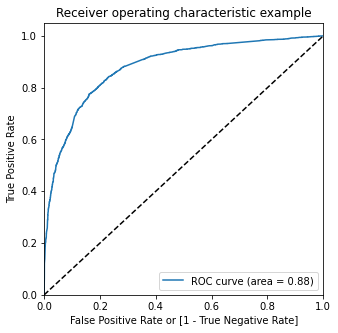

In [2178]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [2179]:
#The ROC Curve should be a value close to 1. We are getting a good value of 0.88 indicating a good predictive model.

In [2180]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.183713,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.376788,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.256902,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.860943,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.757307,7987,1,1,1,1,1,1,1,1,1,0,0


In [2181]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.608880  0.966067  0.385147
0.2   0.2  0.740828  0.915781  0.631242
0.3   0.3  0.797355  0.840556  0.770294
0.4   0.4  0.812785  0.767784  0.840973
0.5   0.5  0.813258  0.694603  0.887580
0.6   0.6  0.797827  0.598119  0.922919
0.7   0.7  0.785546  0.524530  0.949040
0.8   0.8  0.757361  0.414554  0.972087
0.9   0.9  0.721619  0.297629  0.987196


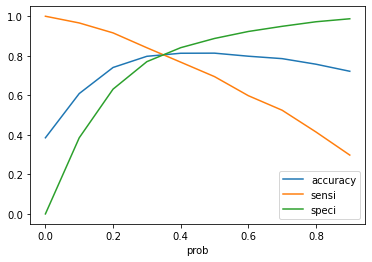

In [2182]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [2183]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [2184]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.183713,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.376788,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.256902,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.860943,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.757307,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [2185]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.183713,3009,0,18
1,0,0.376788,1012,1,38
2,0,0.256902,9226,0,26
3,1,0.860943,4750,1,86
4,1,0.757307,7987,1,76


In [2186]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1976
0     470
Name: final_predicted, dtype: int64

In [2187]:
# check the precentage of final_predicted conversions

1976/float(1976+470)

0.8078495502861816

In [2188]:
##Hence, we can see that the final prediction of conversions have a target of 81% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

In [2189]:
##Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [2190]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8039678790741616

In [2191]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3130,  775],
       [ 470, 1976]], dtype=int64)

In [2192]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2193]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity : ",TP / float(TP+FN))

Sensitivity :  0.8078495502861816


In [2194]:
# Let us calculate specificity
print("Specificity :",TN / float(TN+FP))

Specificity : 0.8015364916773368


In [2195]:
#With the current cut off as 0.40 we have accuracy, sensitivity and specificity of around 80.3%,80.78%,80.15% respectively.

In [2196]:
# Calculate false postive rate - predicting converted lead when the lead was actually not have converted
print("False Positive rate : ",FP/ float(TN+FP))

False Positive rate :  0.19846350832266324


In [2197]:
# Positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.7182842602689931


In [2198]:
# Negative predictive value
print("Negative Predictive Value : ",TN / float(TN+ FN))

Negative Predictive Value :  0.8694444444444445


In [2199]:
##Inference:
#We can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is very good. 
#We have the following values for the Train Data:

#Accuracy : 80.3%
#Sensitivity :80.78%
#Specificity : 80.15%
#Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [2200]:
##Precision and Recall


In [2201]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7946679139382601

In [2202]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6946034341782502

In [2203]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7182842602689931

In [2204]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8078495502861816

In [2205]:
##Precision and Recall Trade-off

In [2206]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

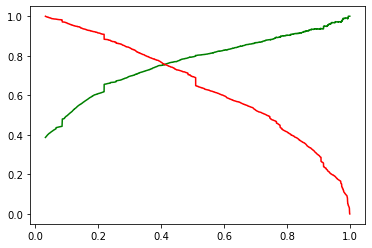

In [2207]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


In [2208]:
##Predictions on the test set
#Scaling the test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3271,-0.292789,0.0,0.304501,-0.591008,0.716169,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1490,-0.292789,0.0,0.666261,1.894051,1.151248,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7936,-0.292789,0.0,-0.419021,-0.743117,-0.153989,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4216,-0.292789,0.0,-1.142542,-0.878732,-1.024147,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3830,-0.292789,0.0,1.751544,-0.578179,2.456484,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2209]:
X_test = X_test[col1]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
3271,-0.591008,0,0,0,0,0,0,1,0,0,0,0
1490,1.894051,1,0,0,0,0,0,0,1,0,0,0
7936,-0.743117,0,0,0,0,0,0,1,0,0,0,0
4216,-0.878732,0,0,1,0,0,0,0,0,1,0,0
3830,-0.578179,1,0,0,0,0,0,0,0,0,0,0


In [2210]:
X_test_sm = sm.add_constant(X_test)

In [2211]:
X_test_sm.shape

(2723, 13)

In [2212]:
y_test_pred = res.predict(X_test_sm)    
y_test_pred[:10]

3271    0.123173
1490    0.968135
7936    0.106057
4216    0.768217
3830    0.123949
1800    0.619879
6507    0.328420
4821    0.288799
4223    0.916589
4714    0.259010
dtype: float64

In [2213]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [2214]:
# Let's see the head
y_pred_1.head()

,0
3271,0.123173
1490,0.968135
7936,0.106057
4216,0.768217
3830,0.123949


In [2215]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)


In [2216]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index


In [2217]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [2218]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.123173
1,1,1490,0.968135
2,0,7936,0.106057
3,1,4216,0.768217
4,0,3830,0.123949


In [2219]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.123173
1,1,1490,0.968135
2,0,7936,0.106057
3,1,4216,0.768217
4,0,3830,0.123949


In [2220]:
#Assigning the leadscore

# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))


In [2221]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3271,0,0.123173,12
1,1490,1,0.968135,97
2,7936,0,0.106057,11
3,4216,1,0.768217,77
4,3830,0,0.123949,12


In [2222]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [2223]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
0,3271,0,0.123173,12,0
1,1490,1,0.968135,97,1
2,7936,0,0.106057,11,0
3,4216,1,0.768217,77,1
4,3830,0,0.123949,12,0


In [2224]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    812
0    177
Name: final_predicted, dtype: int64

In [2225]:
# check the precentage of final_predicted conversions on test data

812/float(812+177)

0.8210313447927199

In [2226]:
#Hence we can see that the final prediction of conversions have a target rate of 81% (appromimately same as predictions made on training data set)

In [2227]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7917737789203085

In [2228]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1344,  390],
       [ 177,  812]], dtype=int64)

In [2229]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [2230]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8210313447927199

In [2231]:
# Let us calculate specificity
TN / float(TN+FP)


0.7750865051903114

In [2232]:
##Precision and Recall metrics for the test set

In [2233]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.6755407653910149

In [2234]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8210313447927199

In [2235]:
#Inference:
#After running the model on the Test Data these are the figures we obtain:

#Accuracy : 79.2%
#Sensitivity :82%
#Specificity : 77.5%

In [2236]:
#Conclusion:

#While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
#Accuracy, Sensitivity and Specificity values of test set are around 79%, 82% and 77.5% which are approximately closer to the respective values calculated using trained set.
#Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
#Hence overall this model seems to be good.

In [2237]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
1,1490,1,0.968135,97,1
8,4223,1,0.916589,92,1
16,1946,1,0.918152,92,1
21,2461,1,0.991944,99,1
23,5822,1,0.998043,100,1
...,...,...,...,...,...
2699,6461,1,0.961453,96,1
2703,5741,1,0.906064,91,1
2709,2815,0,0.864722,86,1
2715,6299,1,0.870245,87,1


In [2238]:
#There are 365 leads which can be contacted and have a high chance of getting converted. 

In [2239]:
#Finding the Prospect ID of the customers to be contacted are :
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([1490, 4223, 1946, 2461, 5822, 2684, 2010, 4062, 7696, 9049, 1518,
       4543, 4830, 4365, 3542, 2504, 7674, 8596, 4003, 4963, 6947, 4807,
        446, 8372, 5805, 3758, 1561, 5367,  737, 6423, 8286, 7174, 4461,
       1436, 7552, 3932, 4080, 1475, 5785, 2860, 7253, 4297, 5490, 1995,
       4498, 5797, 8687,  831, 7653, 2018, 6743, 3976, 5769, 1051, 1663,
       3288, 8959, 7521, 8282, 7239, 8213, 9063, 5292, 6913, 1481,  785,
       3265, 3285, 7433, 3858, 3810, 2009, 8106,  373, 7417, 4179, 8568,
       7268, 6784, 6754, 2960, 7753, 3983,  802, 8745, 4717,  505, 8509,
       6094, 4992, 7036, 2680, 7065,  112, 6149, 7157, 7175, 1675, 6999,
       5826, 8492, 6499, 2481, 3439, 4612, 7129, 4793, 4837, 2495,  822,
       2378, 5075, 7699, 5638, 2342, 8077, 2727,  720, 7489, 2961, 1542,
       5656, 2630, 7909, 6728, 8205, 7060, 6332, 8461, 2427, 5087,  174,
       2674, 8065, 2095, 1568, 8597, 4865, 3535, 4708, 1304, 6066, 6538,
       5700, 1388, 5815, 7970, 7902, 5804, 7805, 50

In [2240]:
#Important Features from our final model:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            5.784131
Lead Source_Reference                                   3.367710
What is your current occupation_Working Professional    2.623701
Last Activity_Other_Activity                            2.310096
Last Notable Activity_Unreachable                       1.548084
Last Activity_SMS Sent                                  1.311452
Total Time Spent on Website                             1.110628
Lead Source_Olark Chat                                  1.020570
const                                                  -0.092634
Last Notable Activity_Modified                         -1.100862
Specialization_Others                                  -1.213700
Lead Origin_Landing Page Submission                    -1.220777
Last Notable Activity_Olark Chat Conversation          -1.375706
dtype: float64

In [2241]:
##Top 3 mportant features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted in decreasin order  are :

#1)Lead Source_Welingak Website 
#2)Lead Source_Reference   
#3)What is your current occupation_Working Professional 